# Массив единиц
Требуется найти длину максимальной последовательности из единиц.

In [1]:
def len_ones(mas):
    best = 0;
    cur = 0;
    for i in mas:
        if (i == 1):
            cur += 1;
            best = max(cur, best)
        else:
            cur = 0;
    return best;
a = [1, 0, 1, 1, 1]
print(len_ones(a));

3


# Анаграммы
Требуется определить являются ли введенные 2 строки анаграммами (состоят из одного набора букв).

In [2]:
from collections import defaultdict
def ifAnagram(A, B):
    # составление словарей, которые будут содержать символы каждой строки и их количество
    dA = defaultdict(int); 
    dB = defaultdict(int);
    for c in A:
        dA[c] += 1; 
    for c in B:
        dB[c] += 1;
    return dA == dB; # возвращаем результат сравнения словарей
A = "ba"
B = "abab"
print(ifAnagram(A, B))

False


###### 2 способ (без подключения сторонних библиотек)

In [51]:
def ifAnagram(A, B):
    if len(A) != len(B):
        return 'no' # если длина строк отличается, сразу вернем "нет"
    M1 = set(A)
    M2 = set(B)
    if M1 != M2:
        return 'no' # если состав строк отличается, сразу "нет"
    # в противном случае создадим импровизированные словари, 
    # состоящие из символа и количества его вхождений в подстроку
    D1 = []
    D2 = []
    k = 0
    for el in M1:
        for i in A:
            if el == i:
                k += 1
        D1.append([el, k])
        k = 0
    for el in M2:
        for i in A:
            if el == i:
                k += 1
        D2.append([el, k])
        k = 0
    # отсортируем, так как может быть различный порядок букв
    D1.sort() 
    D2.sort()
    return 'yes' if D1 == D2 else 'no' # если словари совпадают, то строки являются анаграммами 
A = list(input("A = "))
B = list(input("B = "))
print(ifAnagram(A, B))

A = сон
B = нос
[['н', 1], ['о', 1], ['с', 1]]
[['н', 1], ['о', 1], ['с', 1]]
yes


# Скобочные последовательности
Дано число n. Требуется вывести все правильные скобочные последовательности

In [3]:
def gen(cur, opened, closed, n):
    if (len(cur) == 2 * n):
        if (opened == closed):
            print(cur);
        return;
    if (opened < n):
        gen(cur + '(', opened + 1, closed, n)
    if (closed < n) and (closed < opened):
        gen(cur + ')', opened, closed + 1, n)
gen("", 0, 0, 3)

((()))
(()())
(())()
()(())
()()()


# Задачи из учебника Кормена

## Сравнение сортировок
Предположим, на одной и той же машине проводится сравнительный анализ реализаций двух алгоритмов сортировки, работающих вставкой и слиянием. Для сортировки n элементов вставкой необходимо 8n^2
 шагов, а для сортировки слиянием 64nlg(n)
 шагов. При каком значении n время сортировки вставкой превысит
время сортировки слиянием?

In [8]:
for i in range(50):
    a  = 2**i;
    b = i**8
    if a > b:
        print(a, b, i)

1 0 0
2 1 1
17592186044416 14048223625216 44
35184372088832 16815125390625 45
70368744177664 20047612231936 46
140737488355328 23811286661761 47
281474976710656 28179280429056 48
562949953421312 33232930569601 49


## Сортировка вставкой
Проиллюстрировать работу алгоритма сортировки вставкой на примере массива A = [31, 41, 59, 26, 41, 58]. Сортировку производить в невозрастающем порядке.

In [8]:
def insertionSort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while (i > -1) and (A[i] < key):
            A[i + 1] = A[i]
            i -= 1
        A[i + 1] = key
        print(A)
A = [31, 41, 59, 26, 41, 58]
insertionSort(A)

[41, 31, 59, 26, 41, 58]
[59, 41, 31, 26, 41, 58]
[59, 41, 31, 26, 41, 58]
[59, 41, 41, 31, 26, 58]
[59, 58, 41, 41, 31, 26]


## Сортировка слиянием
Проиллюстрировать работу алгоритма сортировки вставкой на примере массива A = [41, 3, 52, 60, 88, 57, 49, 9]. Сортировку производить по возрастанию.

In [77]:
# слияние двух частей массива
def merge(A, p, q, r):
    n1 = q - p + 1
    n2 = r - q
    L = []
    R = []
    sign = 1e6 # сигнальное значение, добавим его в конец каждой из частей массива
    for i in range(n1):
        L.append(A[p + i])
    L.append(sign)
    for j in range(n2):
        R.append(A[q + j + 1])
    R.append(sign)
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] < R[j]:
            A[k] = L[i]
            i = i + 1
        else:
            A[k] = R[j]
            j = j + 1
            
def mergeSort(A, p, r):
    # делаем рекурсивные вызовы до тех пор, пока левая граница не дойдет до правой (значит в массиве остался 1 элемент)
    if p < r: 
        q = (p + r) // 2  # деление массива пополам
        mergeSort(A, p, q) # рекурсивный вызов левой части массива
        mergeSort(A, q + 1, r) # рекурсивный вызов правой части массива
        merge(A, p, q, r) # слияние 2-ч частей массива
        print(A)
        
A = [41, 3, 52, 60, 88, 57, 49, 9]
mergeSort(A, 0, len(A) - 1)
A


[3, 41, 52, 60, 88, 57, 49, 9]
[3, 41, 52, 60, 88, 57, 49, 9]
[3, 41, 52, 60, 88, 57, 49, 9]
[3, 41, 52, 60, 57, 88, 49, 9]
[3, 41, 52, 60, 57, 88, 9, 49]
[3, 41, 52, 60, 9, 49, 57, 88]
[3, 9, 41, 49, 52, 57, 60, 88]


[3, 9, 41, 49, 52, 57, 60, 88]

## Сортировка слиянием 2.0
Изменить процедуру "merge" так, чтобы в ней не использовались сигнальные значения.

In [25]:
def merge(A, p, q, r):
    n1 = q - p + 1
    n2 = r - q
    L = [A[p + i] for i in range(n1)]
    R = [A[q + j + 1] for j in range(n2)]
    i = 0
    j = 0
    while ((i < n1) and (j < n2)): # если в какой-либо части массива все элементы скопированы, то выходим из цикла
        if L[i] < R[j]:
            A[p + i + j] = L[i]
            i += 1
        else:
            A[p + i + j] = R[j]
            j += 1
    # добавляем в конец все оставшиеся элементы альтернативной части массива
    if (i >= n1):
        for k in range(p + i + j, r + 1):
            A[k] = R[j]
            j += 1
    else:
        for k in range(p + i + j, r + 1):
            A[k] = L[i]
            i += 1
            
def mergeSort(A, p, r):
    if p < r:
        q = (p + r) // 2
        mergeSort(A, p, q)
        mergeSort(A, q + 1, r)
        merge(A, p, q, r)
        print(A)
        
A = [41, 3, 52, 60, 88, 57, 49, 9]
mergeSort(A, 0, len(A) - 1)
A

[3, 41, 52, 60, 88, 57, 49, 9]
[3, 41, 52, 60, 88, 57, 49, 9]
[3, 41, 52, 60, 88, 57, 49, 9]
[3, 41, 52, 60, 57, 88, 49, 9]
[3, 41, 52, 60, 57, 88, 9, 49]
[3, 41, 52, 60, 9, 49, 57, 88]
[3, 9, 41, 49, 52, 57, 60, 88]


[3, 9, 41, 49, 52, 57, 60, 88]

## Сумма двоичных чисел
Рассмотрим задачу сложения двух n-битовых двоичных целых чисел, хранящихся в n-элементных массивых А и В. Сумму этих двух чисел необходимо занести в двоичной форме 

In [32]:
A = [1, 1, 1]
B = [1, 0, 0]
C = []
def sumBit(A, B):
    shift = 0
    for i in range(len(A)):
        k = A[len(A) - i - 1] + B[len(B) - i - 1] + shift
        if k == 0:
            C.insert(0, 0)
        elif (k % 2) == 1:
            C.insert(0, 1)
            if k == 1:
                shift = 0
            else:
                shift = 1
        else:
            C.insert(0, 0)
            shift = 1
    if (shift == 1):
        C.insert(0, 1)
    else:
        C.insert(0, 0)
    print(C)
sumBit(A, B)

[1, 0, 1, 1]


# Задачи ШАД

## J. Найти среднее геометрическое на отрезке

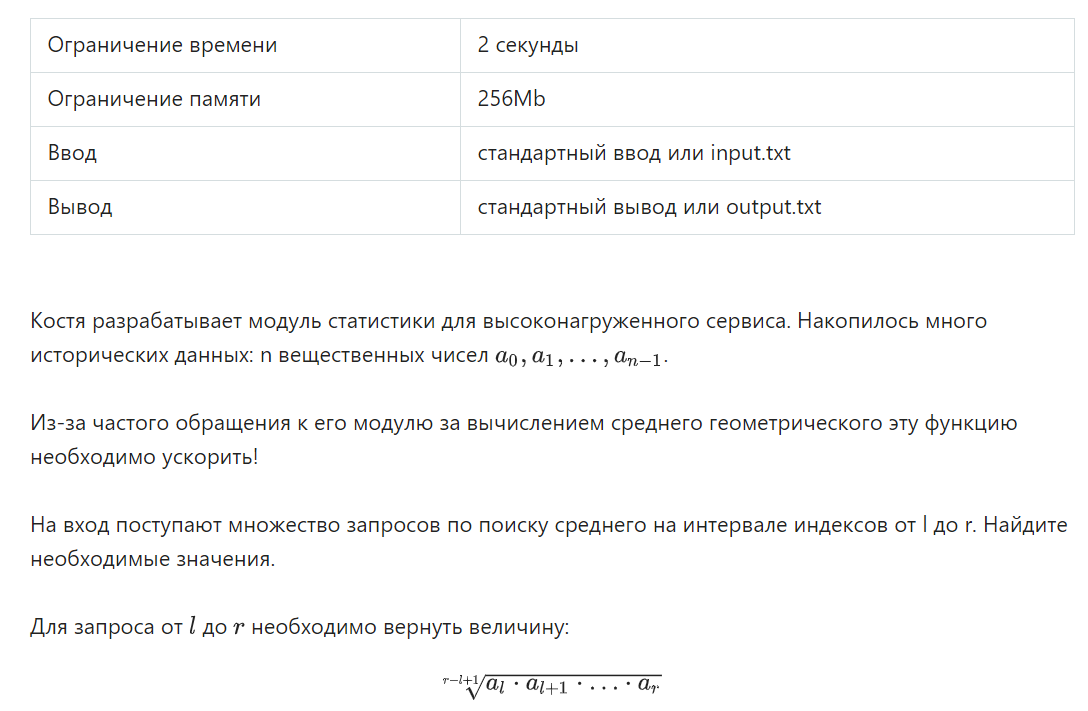

In [15]:
from IPython.display import Image
Image(filename='1.png')

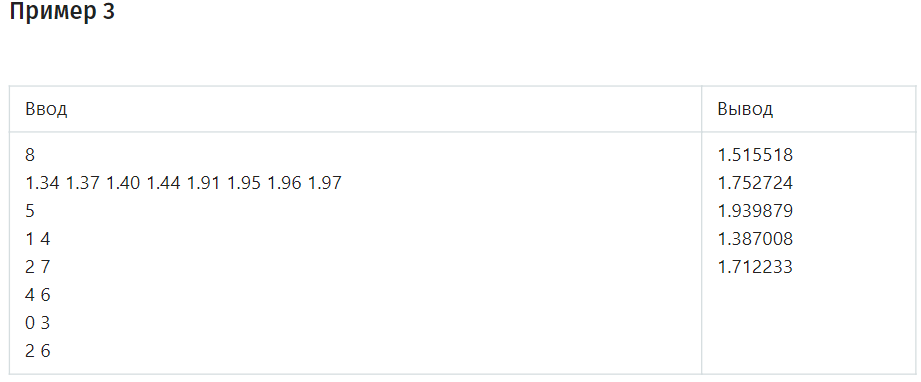

In [19]:
Image("J2.png")

In [12]:
import math
n = int(input("n = "))
data = [float(input()) for i in range(n)]
print(data)
lnsums = [0 for i in range(n + 1)]
k = 0.0
for i in range(n):
    lnsums[i] = k
    k += math.log(data[i])
lnsums[n] = k
print(lnsums)
q = int(input("q = "))
for i in range(q):
    l = int(input("l = "))
    r = int(input("r = "))
    print(math.exp((lnsums[r + 1] - lnsums[l]) / (r - l + 1)))
# 1.34 1.37 1.40 1.44 1.91 1.95 1.96 1.97

n = 8
1.34
1.37
1.40
1.44
1.91
1.95
1.96
1.97
[1.34, 1.37, 1.4, 1.44, 1.91, 1.95, 1.96, 1.97]
[0.0, 0.29266961396282004, 0.6074803538028537, 0.9439525904240667, 1.3085957040119758, 1.9556989460705143, 2.6235283186461698, 3.2964727918885957, 3.974506334638493]
q = 5
l = 1
r = 4
1.515518058064813
l = 2
r = 7
1.7527237329612508
l = 4
r = 6
1.939879186156263
l = 0
r = 3
1.3870080233609114
l = 2
r = 6
1.7122332072268933


## K. Удалить последнего

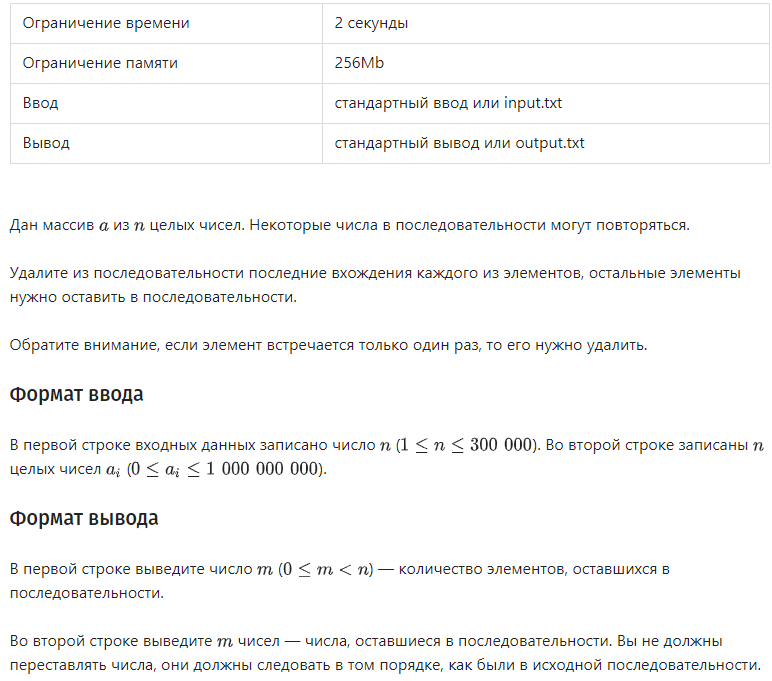

In [36]:
from IPython.display import Image
Image(filename='K. Удалить последнего.png')

In [10]:
data = [1, 1, 5, 2, 3, 3, 4, 2, 5]
num_set = set()
res = []
k = len(data)
for val in reversed(data):
    if val in num_set:
        res.append(val)
    else:
        num_set.add(val)
        k -= 1;
print(k)
for i in reversed(res):
    print(i, end = ' ')

4
1 5 2 3 

## L. Доска объявлений

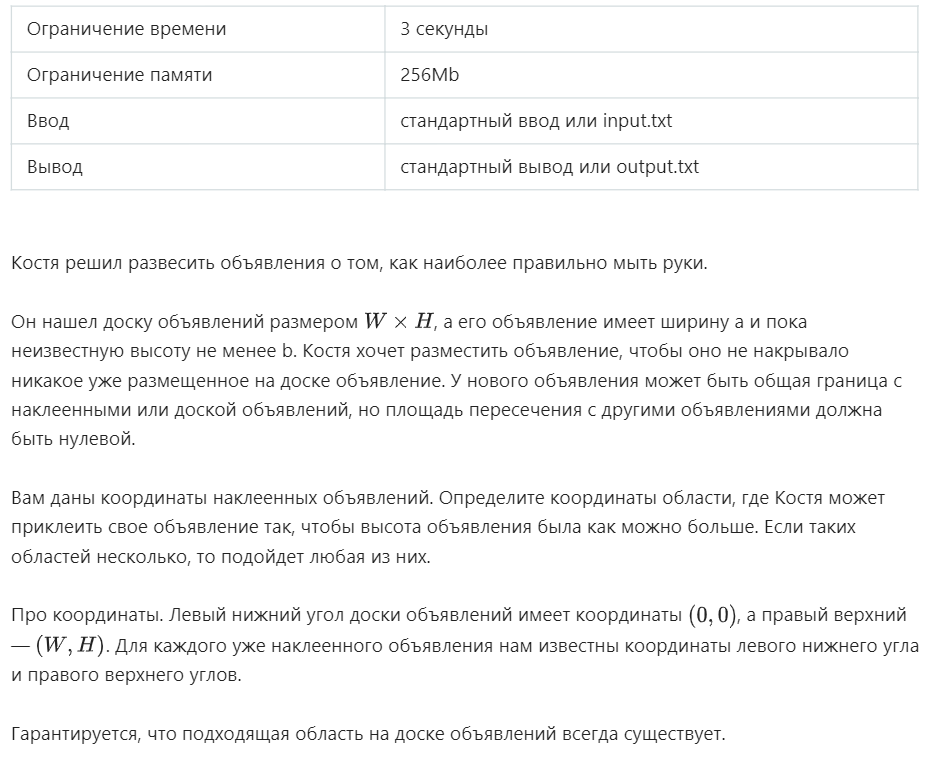

In [16]:
from IPython.display import Image
Image(filename='L.png')

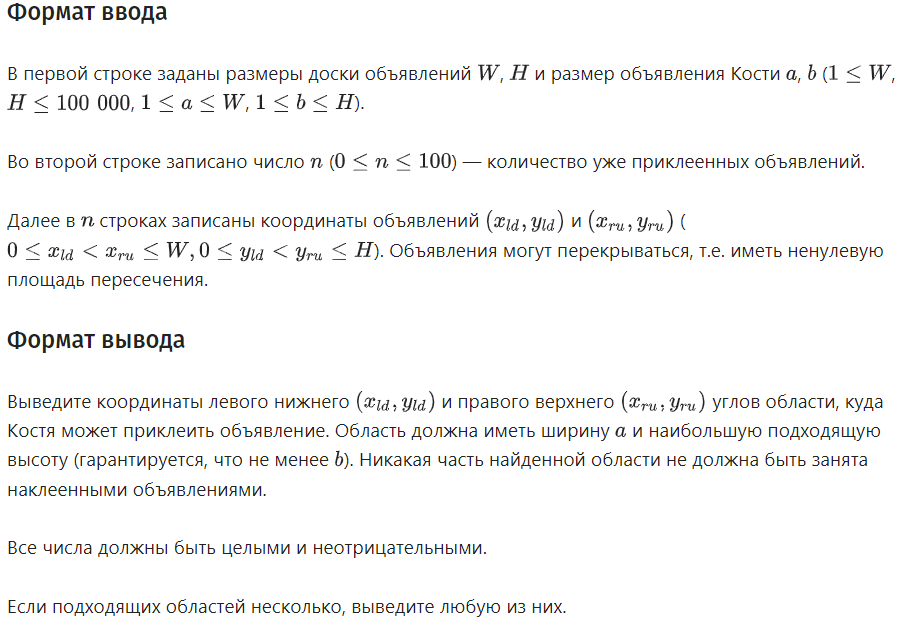

In [17]:
Image(filename='L2.png')

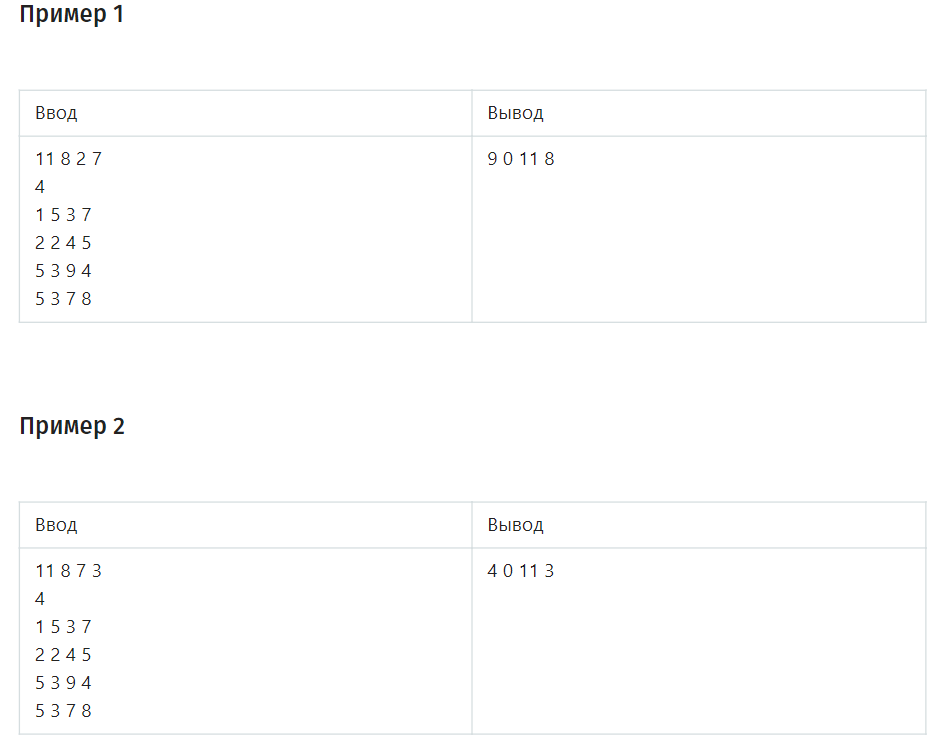

In [18]:
Image(filename='L3.png')

In [13]:
W = int(input("W = "))
H = int(input("H = "))
a = int(input("a = "))
b = int(input("b = "))
n = int(input("n = "))
coords = [[0] * 4 for i in range(n)]
max_height = -1
answer = [0, 0, 0, 0]
for i in range(n):
    for j in range(4):
        coords[i][j] = int(input())
for x in range(0, W - a + 1):
    pairs = []
    for i in coords:
        if (i[0] >= x + a) or (i[2] <= x):
            continue
        pairs.append([i[1], i[3]])
    pairs.append([0, 0])
    pairs.append([H, H])
    pairs.sort()
    for i in range(len(pairs)):
        if i == 0:
            continue
        if pairs[i][0] <= pairs[i - 1][1]:
            pairs[i - 1][1] = pairs[i][1]
    for i in range(len(pairs)):
        if i == 0:
            continue
        if (pairs[i][0] - pairs[i - 1][1]) > max_height:
            max_height = pairs[i][0] - pairs[i - 1][1];
            answer[0] = x
            answer[1] = pairs[i-1][1]
            answer[2] = x + a
            answer[3] = pairs[i][0]
answer

W = 11
H = 8
a = 7
b = 3
n = 4
1
5
3
7
2
2
4
5
5
3
9
4
5
3
7
8


[4, 0, 11, 3]

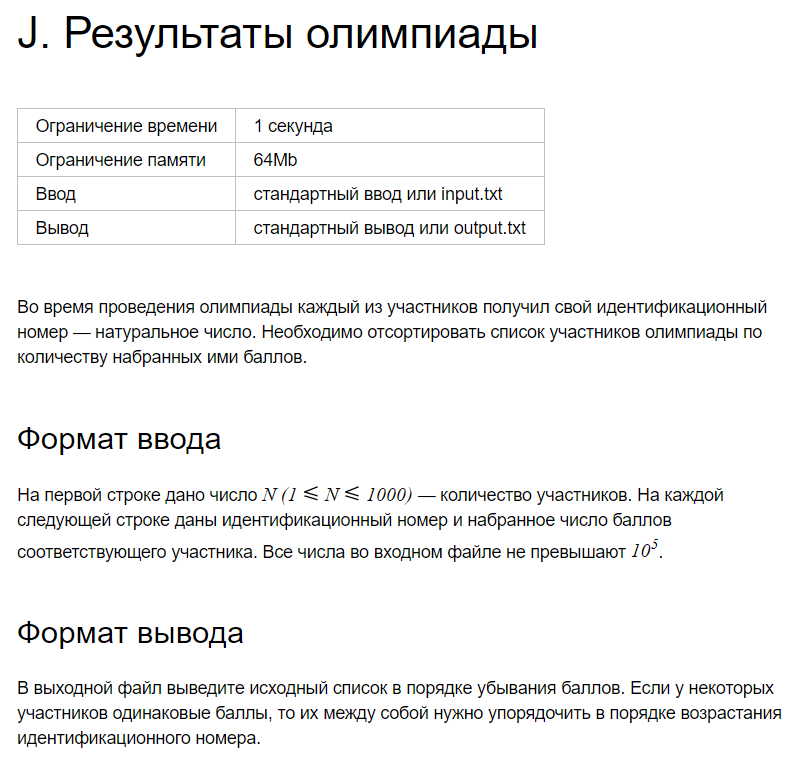

In [24]:
from IPython.display import Image
Image(filename='Результаты олимпиады.png')

In [23]:
a = [
    [101, 90], 
    [305, 80],
    [200, 80],
    [111, 14],
    [800, 50],
    [1, 80]
]

a.sort(key = lambda x: (-x[1], x[0])) # сортировка по 2 ключам

# Печать двумерного списка в текстовый файл
outfile = open('output.txt', 'w')
for element in a:
    outfile.write(" ".join((str(x) for x in element)) + '\n')
outfile.close()

a

[[101, 90], [1, 80], [200, 80], [305, 80], [800, 50], [111, 14]]

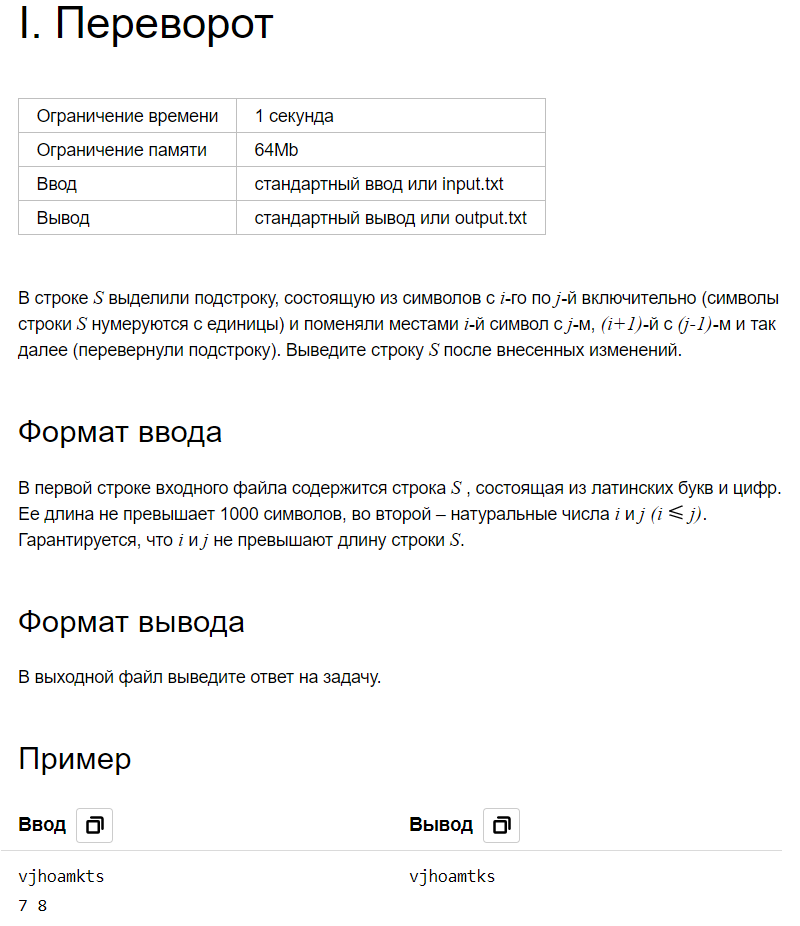

In [39]:
from IPython.display import Image
Image(filename='Переворот.png')

In [40]:
string = list(input())
interval = list(map(int, input().split()))
a, b = interval[0], interval[1]
k = 0
for i in range(a - 1, a + ((b - a) // 2)):
    s = string[i]
    string[i] = string[b - 1 - k]
    string[b - 1 - k] = s
    k += 1
print(''.join(map(str, string))) 

vjhoamkts
7 8
vjhoamtks


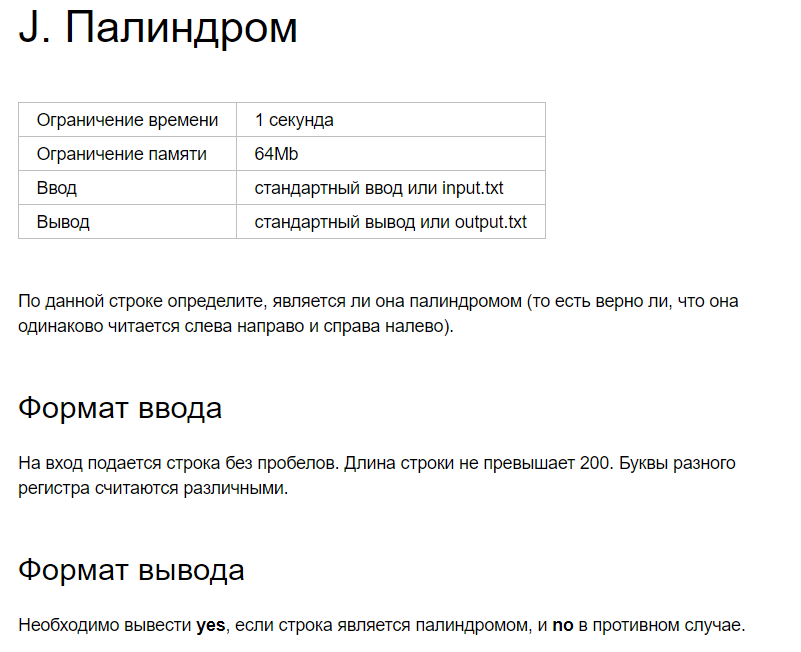

In [1]:
from IPython.display import Image
Image(filename='Палиндром.png')

In [7]:
string = list(input())
flag = 1
for i in range(len(string) // 2): # проходим половину символов 
    if string[i] != string[-i - 1]: # сравниваем "противоположные" символы строки
        flag = 0
        break # если хотя бы 1 символ не совпадает, сразу выходим из цикла
print('yes' if flag else 'no') 

шалаш
yes


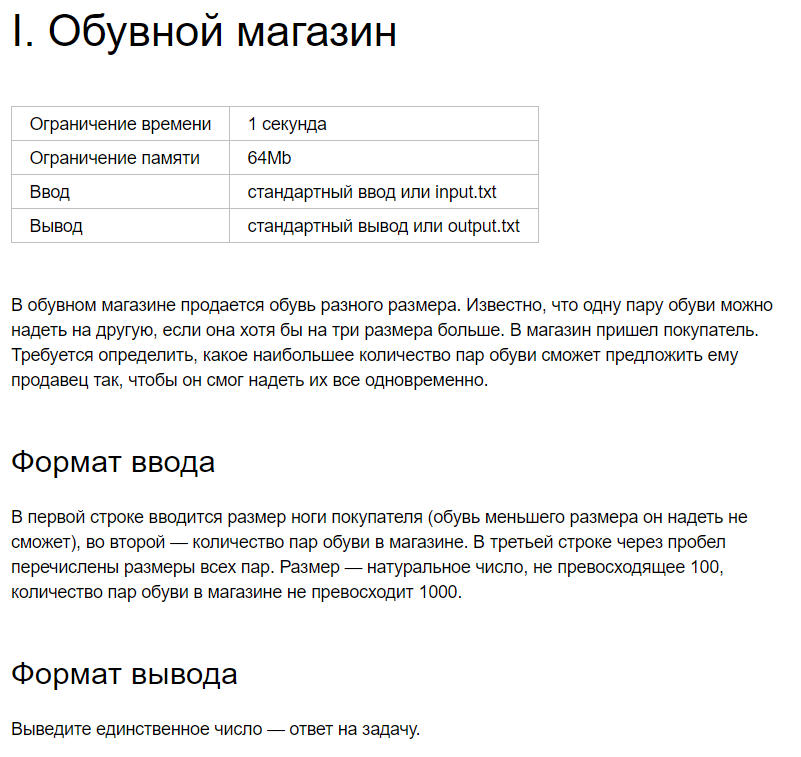

In [2]:
from IPython.display import Image
Image(filename='Обувной магазин.png')

In [3]:
n, m = int(input('n = ')), int(input('m = '))
sizes = list(map(int, input().split()))
sizes.sort()
k = 0
for i in sizes:
    if i >= n:
        n = i + 3
        k += 1
print(k)

n = 40
m = 5
36 40 42 43 46
3


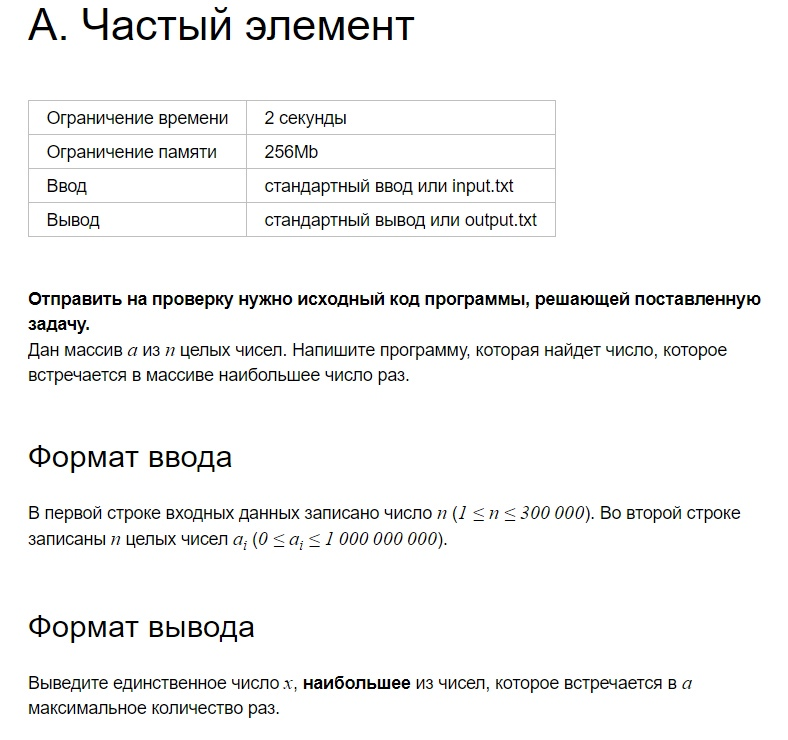

In [4]:
from IPython.display import Image
Image(filename='Частый элемент.jpg')

In [6]:
n = int(input())
a = list(map(int, input().split()))
max_enters = 0
max_index = 0
k = 0
for i in range(n):
    for j in range(n):
        if a[j] == a[i]:
            k += 1
    if (k >= max_enters): 
        if (a[i] > a[max_index]):
            max_index = i
        max_enters = k
    k = 0
print(a[max_index])

3
3 3 3
3


In [22]:
n = int(input())
a = list(map(int, input().split()))
s = set(a)
k = 0
max_enters = 0
for i in s:
    k = a.count(i)
    if max_enters < k or (max_enters == k and i > el):
        max_enters = k
        el = i
print(el)

4
4 88 88 11 11 11
11


In [72]:
n = int(input())
a = list(map(int, input().split()))
s = set(a)
k = 0
max_enters = 0
b = []
for i in s:
    k = a.count(i)
    if k >= max_enters:
        max_enters = k
        b.append([i, k])
b = [i[0] for i in b if i[1] == max_enters]
print(max(b))

7
4 88 88 11 11 11 88
88


In [12]:
n = int(input())
a = list(map(int, input().split()))
a = sorted(a, reverse=True)
k = 0
max_enters = 0
el = a[0]
for i in range(len(a)):
    if a[i] == el:
        k += 1
    else:
        if max_enters < k:
            el = a[i - 1]
        k = 0
print(el)

5
4 1 4 3 3
4


In [26]:
from collections import Counter
n = int(input()) 
a = [int(i) for i in input().split()]
c = Counter(a).most_common()
max_inner = c[0][1]
c = [i[0] for i in c if i[1]==max_inner]
print(max(c))

5
4 1 4 3 3
4


In [17]:
a = [1, 2, 3, 2, 2]
Counter(a).most_common()

[(2, 3), (1, 1), (3, 1)]

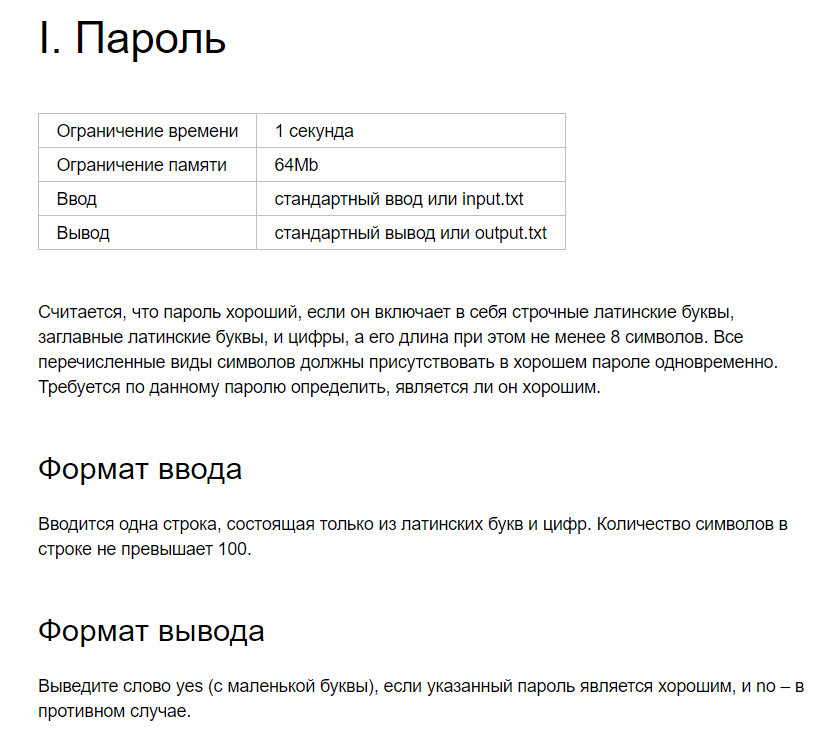

In [14]:
from IPython.display import Image
Image(filename='Пароль.png')

In [80]:
string = list(input())
length = len(string) >= 8
lower = 0
upper = 0
digit = 0
for i in string:
    if not length:
        break
    if '0' <= i <='9':
        digit = True
    if 'a' <= i <= 'z':
        lower = True
    if 'A' <= i <= 'Z':
        upper = True
print('yes' if length and lower and upper and digit else 'no')

Hello12345
yes


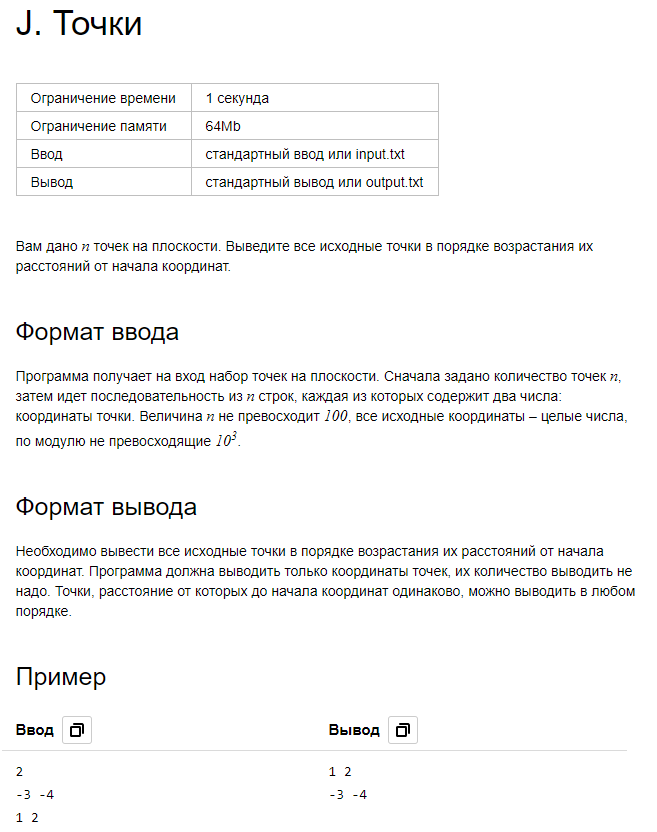

In [81]:
from IPython.display import Image
Image(filename='Точки.png')

In [82]:
data = []
dot = []
n = int(input())
for i in range(n):
    dot = list(map(int, input().split()))
    distance = (dot[0]**2 + dot[1]**2)**(1/2)
    dot.append(distance)
    data.append(dot)
data.sort(key = lambda x: x[2])
for i in range(n):
    print(data[i][0], data[i][1])

2
-3 -4
1 2
1 2
-3 -4


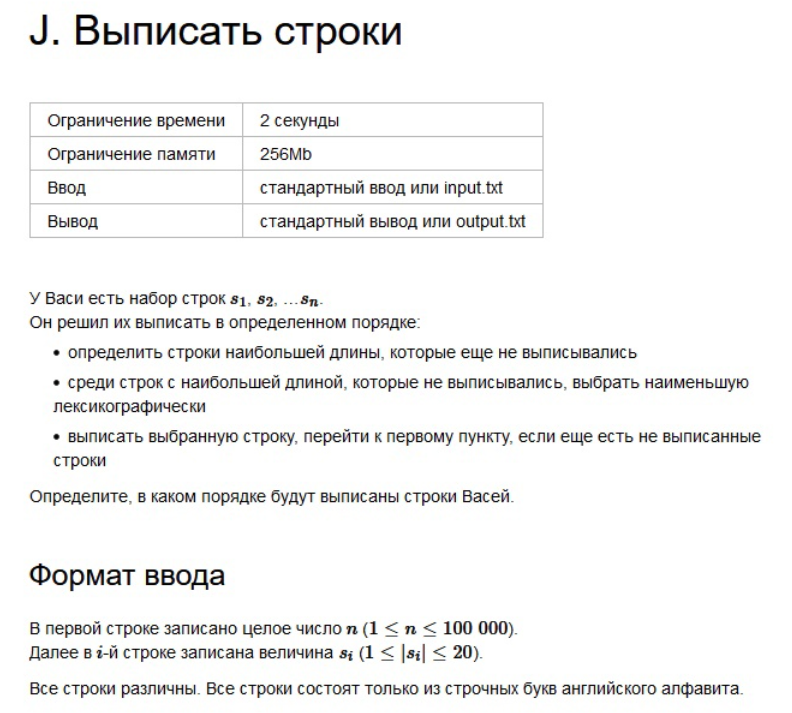

In [1]:
from IPython.display import Image
Image(filename='Выписать строки.png')

In [5]:
n = int(input())
s = input().split()
strings = []
for i in range(n):
    strings.append([s[i], len(s[i])])
strings.sort(key=lambda x: (-x[1], x[0]))
for i in range(n):
    print(strings[i][0])

3
jjjjj jjj aaj nnn
jjjjj
aaj
jjj


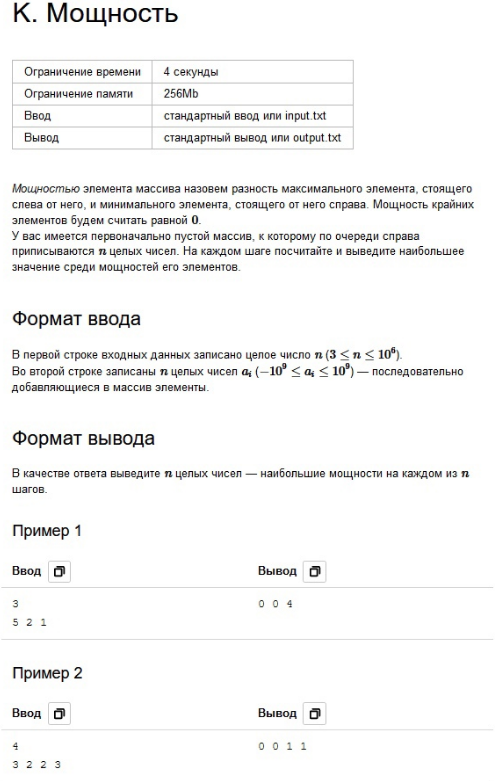

In [2]:
from IPython.display import Image
Image(filename='Мощность.png')

In [6]:
n = int(input())
numbers = list(map(int, input().split()))
A = []
max_ = -1e11
min_ = 1e11
print("0 0", end=' ') # так как на вход подается n >= 3, сначала обязательно будет 2 нуля
for i in range(n):
    max_d = -1e11
    A.append(numbers[i])
    if len(A) < 3: # пропускаем случаи с нулевой мощностью
        continue
    for j in range(1, len(A) - 1):
        max_ = max(A[: j]) # максимум из элементов слева 
        min_ = min(A[j + 1:]) # минимум из элементов справа
        d = max_ - min_ # мощность
        if d > max_d:
            max_d = d
    print(max_d, end=' ')

4
3 2 2 3
0 0 1 1 

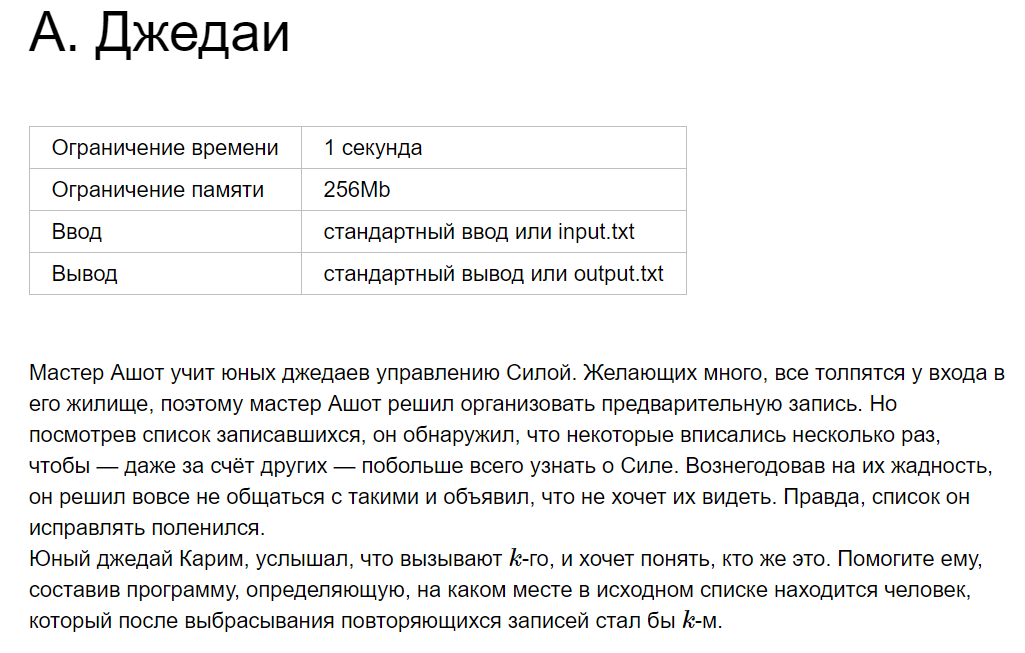

In [7]:
from IPython.display import Image
Image(filename='Джедаи.png')

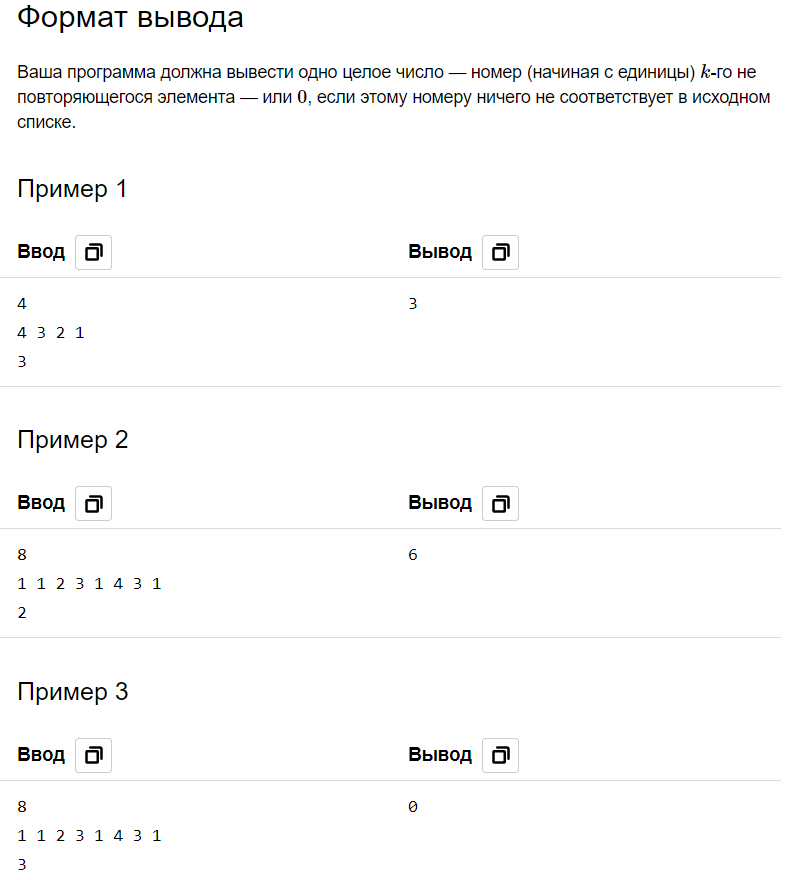

In [6]:
Image(filename='Джедаи вывод.png')

In [9]:
n = int(input())
a = list(map(int, input().split()))
k = int(input())
d = {}
for i, val in enumerate(a):
    if val in d:
        d[val] = 0
    else:
        d[val] = i + 1
for el in a:
    if el in d and d[el] == 0:
        del d[el]
keys = list(d.keys())
if k <= len(keys):
    print(d[keys[k - 1]])
else:
    print(0)

8
1 1 2 3 1 4 3 1
2
6
